In [4]:
# Começando com a leitura e limpeza dos dados

import pandas as pd

# Leitura do dataset
df = pd.read_csv('exames.csv')

In [6]:
# Exibir as primeiras linhas do DataFrame
print(df.head())

        Data       Exame  Quantidade  Receita        Região
0 2025-02-13  Colesterol          85     4590         Bahia
1 2025-03-19  Colesterol          47     1692         Bahia
2 2025-02-25         PCR          87     4350    Pernambuco
3 2025-02-16         PCR          70     3780     São Paulo
4 2025-05-17         TSH          17      969  Minas Gerais


In [5]:
# Converter a coluna 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d', errors='coerce')

# Verificando os tipos de dados
df.dtypes

Data          datetime64[ns]
Exame                 object
Quantidade             int64
Receita                int64
Região                object
dtype: object

In [7]:
# Corrigindo tipos de dados
df['Quantidade'] = df['Quantidade'].astype(int)
df['Receita'] = df['Receita'].astype(float)

# Criando colunas adicionais
df['Mes'] = df['Data'].dt.to_period('M')

In [ ]:
# Agora estarei realizando a estatística descritiva. 
print(df.describe())
print(df['Exame'].value_counts())
print(df.groupby('Mes')['Quantidade'].sum())

                      Data  Quantidade      Receita
count                  100  100.000000   100.000000
mean   2025-04-02 19:26:24   64.410000  3475.320000
min    2025-01-01 00:00:00   10.000000   350.000000
25%    2025-02-19 06:00:00   36.000000  1923.750000
50%    2025-03-29 00:00:00   69.000000  3240.000000
75%    2025-05-17 18:00:00   89.250000  4549.500000
max    2025-06-28 00:00:00  120.000000  9282.000000
std                    NaN   33.118122  2222.142964
Exame
Colesterol        18
Triglicerídeos    17
Hemograma         17
Vitamina D        14
PCR               12
TSH               11
Glicemia          11
Name: count, dtype: int64
Mes
2025-01     792
2025-02    1417
2025-03     916
2025-04     988
2025-05    1427
2025-06     901
Freq: M, Name: Quantidade, dtype: int32



- count	-> Quantos valores válidos existem
- mean	-> Média aritmética dos valores
- std	->   Desvio padrão (variação dos dados)
- min	->   Valor mínimo
- 25%	->   Primeiro quartil (limite inferior de 25% dos dados)
- 50%	->    Mediana (valor central)
- 75%	->    Terceiro quartil (limite superior de 75% dos dados)
- max	->    Valor máximo

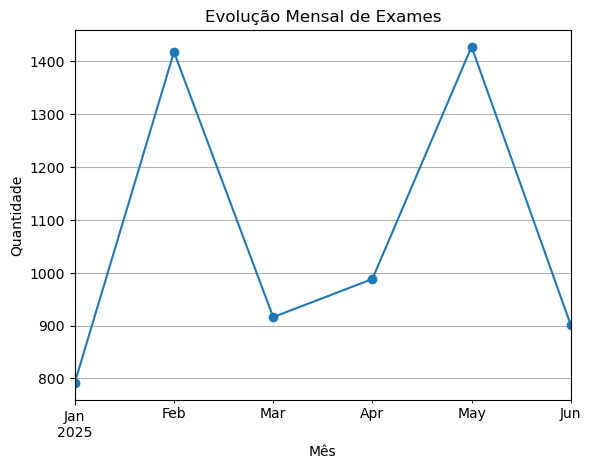

In [11]:
# Visualização dos dados
import matplotlib.pyplot as plt

# Evolução mensal
df.groupby('Mes')['Quantidade'].sum().plot(kind='line', marker='o')
plt.title('Evolução Mensal de Exames')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.grid()
plt.show()

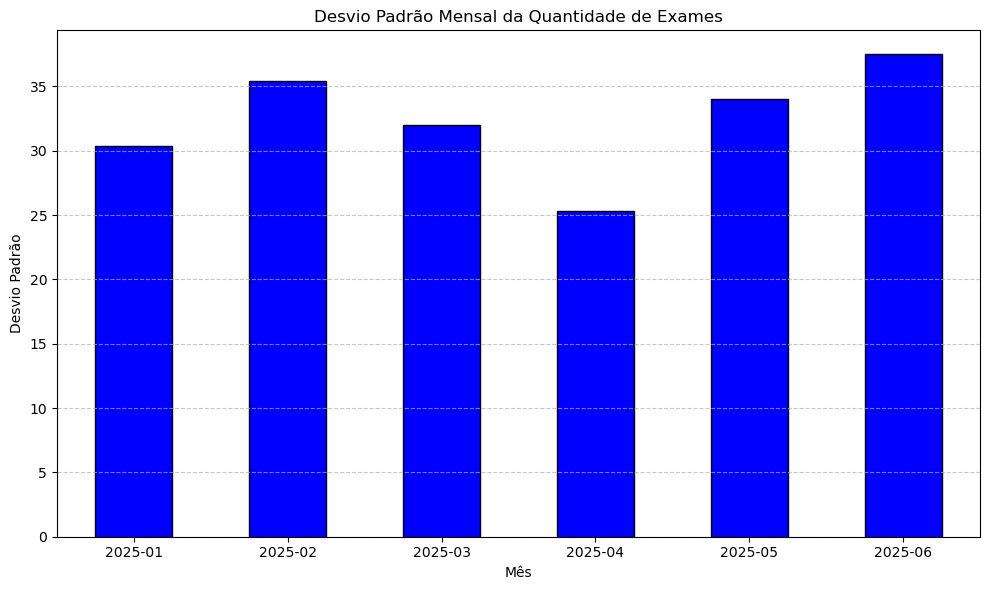

In [13]:
# Calcula o desvio padrão por mês
desvio_padrao_mensal = df.groupby('Mes')['Quantidade'].std()

# Cria o gráfico de barras do desvio padrão
plt.figure(figsize=(10, 6))
desvio_padrao_mensal.plot(kind='bar', color='blue', edgecolor='black')

plt.title('Desvio Padrão Mensal da Quantidade de Exames')
plt.xlabel('Mês')
plt.ylabel('Desvio Padrão')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Converte a coluna Mes para string, pois não é suportado o Period no SQLite
df['Mes'] = df['Mes'].astype(str)

# Salva no banco SQLite
import sqlite3
conn = sqlite3.connect('exames.db')
df.to_sql('exames', conn, if_exists='replace', index=False)
# Exemplo de query

query = "SELECT Mes, SUM(Quantidade) as Total_Exames FROM exames GROUP BY Mes ORDER BY Mes"
con = sqlite3.connect('exames.db')

print(pd.read_sql_query(query, con))


       Mes  Total_Exames
0  2025-01           792
1  2025-02          1417
2  2025-03           916
3  2025-04           988
4  2025-05          1427
5  2025-06           901


In [22]:
# Modelo de previsão com regressão linear

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Exemplo: prever Receita com base na Quantidade
x = df[['Quantidade']]
y = df['Receita']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("Coeficiente:", model.coef_)
print("Intercepto:", model.intercept_)

MSE: 1549686.6151309
Coeficiente: [59.88606702]
Intercepto: -371.7329805996469


MSE = Mean Squared Error (Erro Quadrático Médio)
-Esse valor mede o quanto as previsões do modelo diferem dos seus valores reais.
-Quanto menor o MSE, melhor está o modelo
-Como a "Receita" dos dados está com valores altos (na casa de milhares), esse número não é tão absurdo - mas indica que há aluma variação não explicada apenas na variável "Quantidade"

Exemplo:

Um MSE de "1.549.686" Significa que, em média, o erro ao quadrado entre previsão e real é esse número.
Se tiramos a raiz quadrada (RMSE), tem uma noção mais intuitiva:



In [28]:

import numpy as np
RMSE = np.sqrt(1549686.6151309)
print("RMSE:", RMSE)


RMSE: 1244.864095044475


O resaultado "RMSE: 1244.864095044475" significa que daria 1.245 reais de erro médio por previsão.

 Já o Coeficiente: 59.88606702
Quer dizer que a cada 1 exame a mais (Quantidade), a Receita aumenta em média R$ 59,89.

- Intercepto: -371.73

É o ponto onde a reta cruza o eixo Y (Receita) quando a Quantidade é zero.

Ou seja, se não houver nenhum exame, a receita prevista pelo modelo seria –R$ 371,73 (valor negativo, que não faz sentido prático, mas é normal em modelos simples).

Isso significa que a linha de regressão está ajustada aos dados de forma que passa ligeiramente abaixo da origem.

- Interpretação prática do seu modelo

Cada exame extra → R$ 59,89 a mais em receita.

Receita estimada ≈ 59,89 × Quantidade – 371,73

O modelo tem um erro médio de ± R$ 1.245,00.

- Nessa parte realizamos primeiro a visualização da reta de regressão + dados reais e plotar os resíduos para entender os erros do modelo


- Vale uma explicação do que é os resíduos.

Seria o quanto o modelo errou para cada ponto.

Se o resíduo é 0 → previsão perfeita.

Se é positivo → modelo previu menos que o real.

Se é negativo → modelo previu mais que o real.

- Em uma boa regressão linear, os resíduos costumam:

se distribuir aleatoriamente em torno de 0,

não apresentar tendência clara

e ter magnitude razoável.

c:\Users\Fábio\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


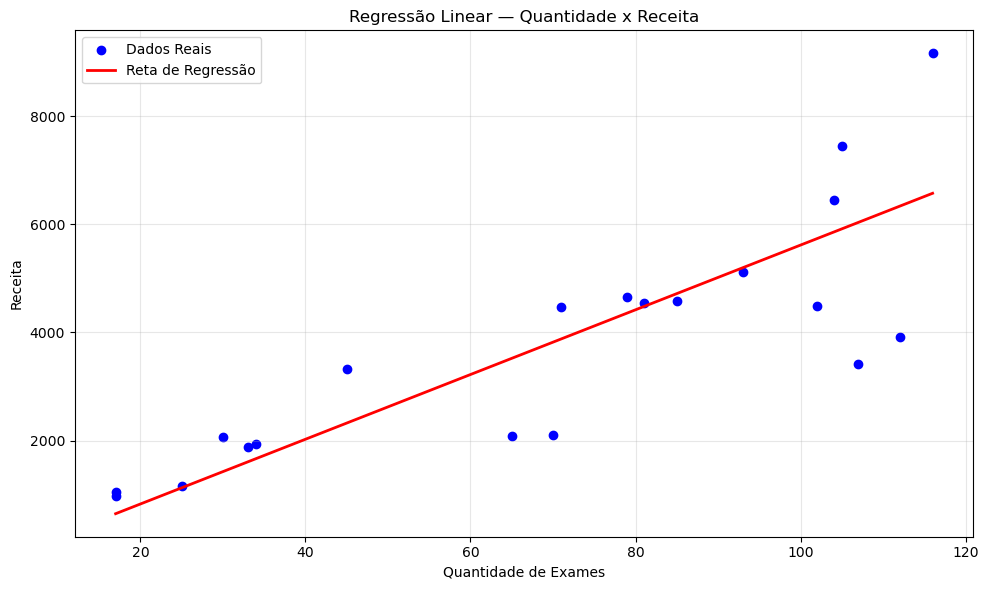

In [ ]:
# Previsões do modelo
y_pred = model.predict(x_test)

# Cálculo dos resíduos
residuos = y_test - y_pred

# 1. Gráfico da regressão linear

plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, color='blue', label='Dados Reais')
X_line = np.linspace(x_test.min(), x_test.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)
plt.plot(X_line, y_line, color='red', linewidth=2, label='Reta de Regressão')
plt.title('Regressão Linear — Quantidade x Receita')
plt.xlabel('Quantidade de Exames')
plt.ylabel('Receita')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Se os pontos estiverem próximos da linha → bom ajuste.

Se estiverem muito espalhados → modelo linear simples não explica bem toda a variação (talvez outras variáveis possam melhorar a previsão).

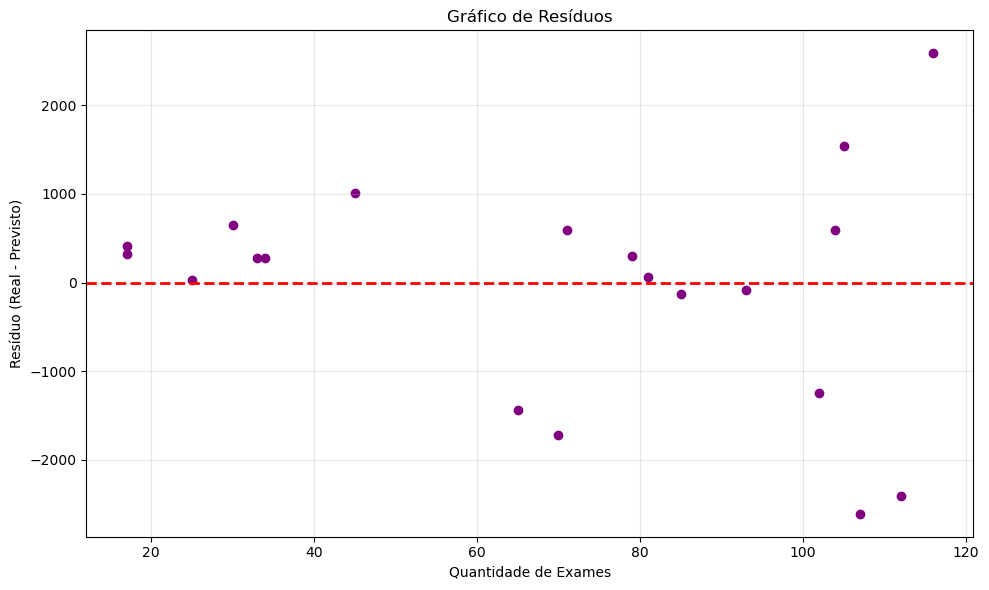

In [ ]:

# 2. Gráfico dos resíduos

plt.figure(figsize=(10,6))
plt.scatter(x_test, residuos, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Gráfico de Resíduos')
plt.xlabel('Quantidade de Exames')
plt.ylabel('Resíduo (Real - Previsto)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Como interpretar o gráfico de resíduos:

- Se os pontos estão bem espalhados em torno da linha vermelha (y = 0) → ótimo sinal, seu modelo linear está funcionando bem.

- Se aparecem padrões (por exemplo, resíduos maiores para quantidades altas) → talvez o modelo linear não esteja capturando bem alguma relação e outro modelo mais complexo (como regressão polinomial ou árvore de decisão) poderia ser melhor.

- Pontos muito afastados da linha → são outliers ou erros grandes que vale investigar.

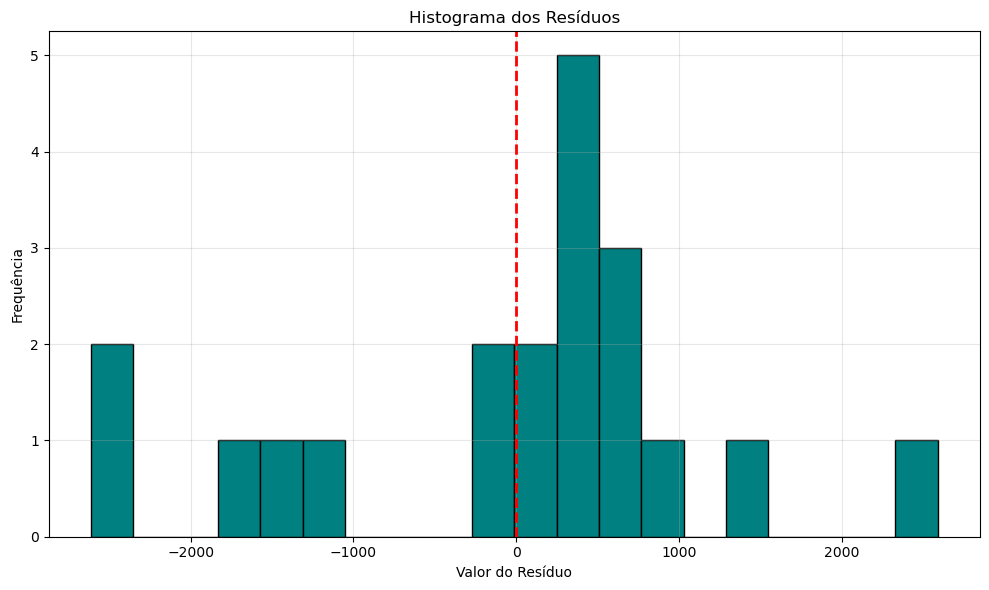

In [ ]:
# Histograma dos resíduos

plt.figure(figsize=(10,6))
plt.hist(residuos, bins=20, color='teal', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.title('Histograma dos Resíduos')
plt.xlabel('Valor do Resíduo')
plt.ylabel('Frequência')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- Distribuição centrada em 0 → o modelo erra tanto para cima quanto para baixo, de forma equilibrada.

- Assimétrica ou com caudas longas → pode haver outliers ou um viés sistemático nas previsões.

- Muito espalhada → indica que o modelo está errando bastante.

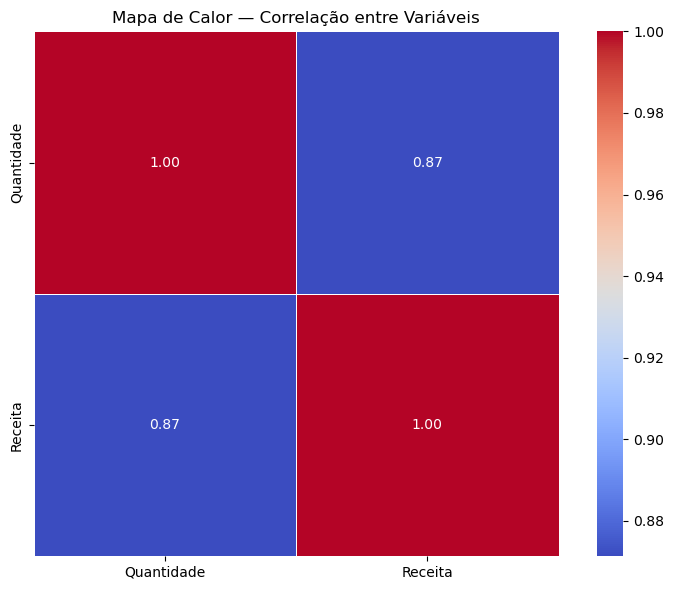

In [38]:
import seaborn as sns

# Calcula a matriz de correlação
corr = df.corr(numeric_only=True)  # garante que só use colunas numéricas

# Configuração do gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,          # mostra os números dentro das células
    cmap='coolwarm',     # cores do mapa
    fmt=".2f",           # formato dos números
    linewidths=0.5,      # linhas de separação
    square=True
)

plt.title('Mapa de Calor — Correlação entre Variáveis')
plt.tight_layout()
plt.show()


- Montei uma mapa de calor para verificar a correlação entre as variáveis e pelos números apresentado a de se notar que há uma forte realação linear entre a quantidade de exames a receita deles.